# 1.0 Análise Exploratoria de Dados (EDA) - Telco Churn
**Objetivo:** Entender o comportamento dos clientes, identificar padrões de cancelamento e validade a qaulidade dos dados vindos do banco SQL

In [1]:
# Import inicial de blibiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Caminho dinâmico para o banco de dados
db_path = os.path.join('..', 'data', 'telecom.db')

print(f"Caminho do banco: {db_path}")

Caminho do banco: ..\data\telecom.db


In [3]:
# Carregando dados do banco, query para puxar a tabela, conexão SQLite e fechando conexao.
conn = sqlite3.connect(db_path)

query = "SELECT * FROM tbl_churn_raw"

df = pd.read_sql(query, conn)

conn.close()

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
## Pela query via SQL, percebemos valores nulos na coluna total_charges
df['totalcharges'].isnull().sum()

np.int64(11)

In [7]:
df.duplicated().sum()

np.int64(0)

C:\Users\init\AppData\Local\Temp\ipykernel_18840\1535239022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

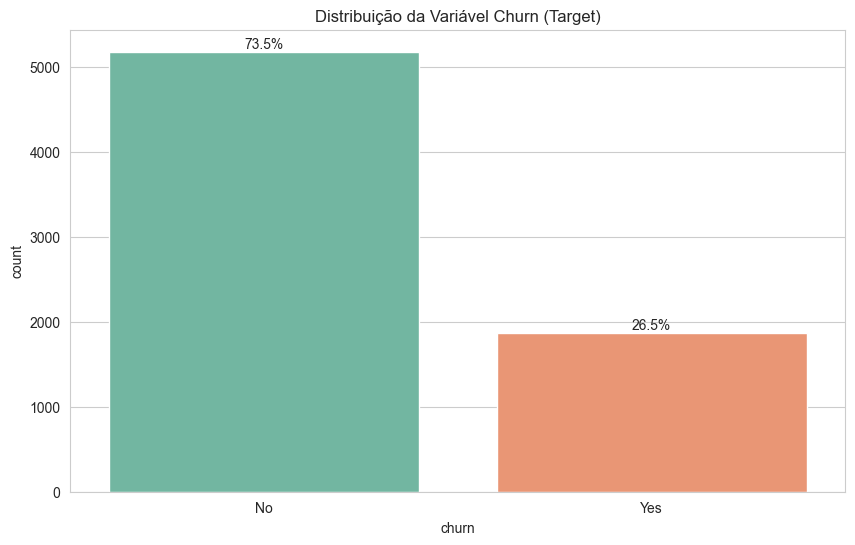

In [8]:
# Analise Gráfica
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Visualizando o desbalanceamento
target = 'churn'
ax = sns.countplot(x='churn', data=df, palette='Set2')
total = len(df)
for i in ax.patches:
    percentage = f'{100 * i.get_height() / total:.1f}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribuição da Variável Churn (Target)')   
plt.show

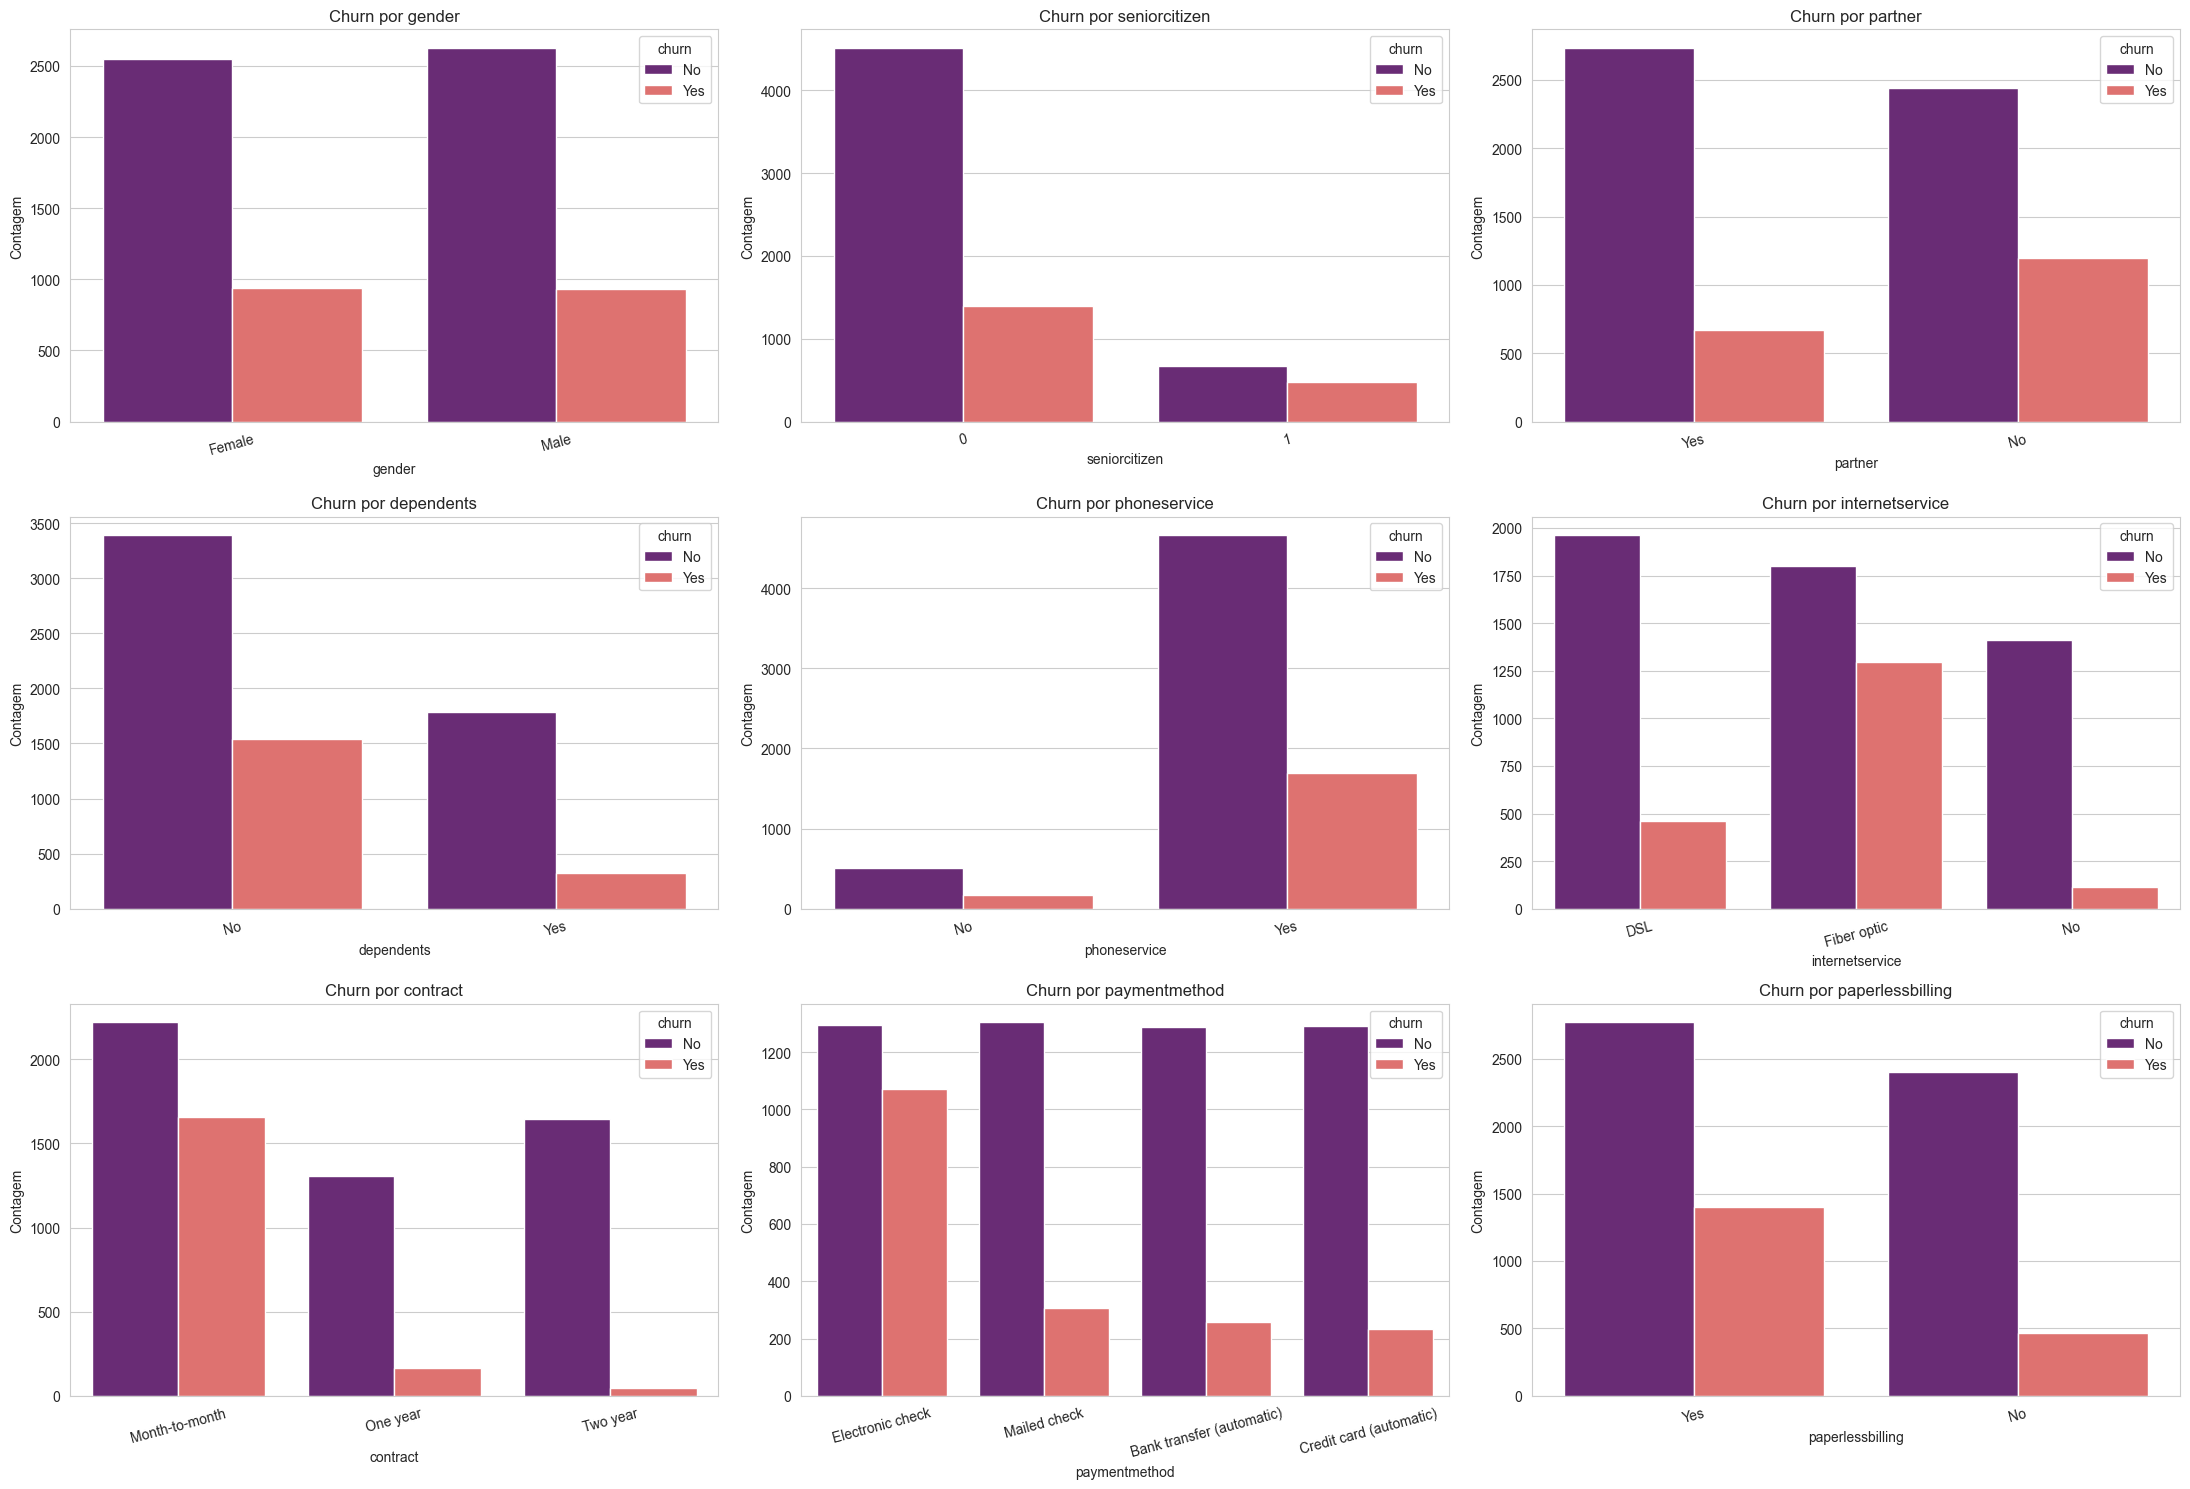

In [11]:
# Selecionando colunas categóricas (excluindo ID e o próprio Churn)
cat_cols = [
    'gender', 'seniorcitizen', 'partner', 'dependents', 
    'phoneservice', 'internetservice', 'contract', 
    'paymentmethod', 'paperlessbilling'
]

# Configurando o grid de gráficos (3 por linha)
fig, axes = plt.subplots(3, 3, figsize=(22, 15))
axes = axes.flatten() # Transforma a matriz em uma lista linear para facilitar o loop

for i, col in enumerate(cat_cols):
    # Gráfico de contagem dividido por Churn (hue='churn')
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i], palette='magma')
    axes[i].set_title(f'Churn por {col}')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=15) # Gira o texto se for longo

plt.tight_layout()
plt.show()

 Clientes que optam por **Fiber Otic** em **internetservice**, tem o churn muito alto, ideial migrar para outro serviço de internet
 

 Clientes que tem o **contract** por **month-to-month** é recomendo aos elaborar uma campanha para clientes que tenham contrato por mais de um ano.
 

 Clientes com pagamentos **'Electronic check'** tambem são churn muito alto, recomendo oferecerem outros meios de pagamentos para evitar o churn tao alto 
 


# 2.0 Analisando variáveis numéricas

C:\Users\init\AppData\Local\Temp\ipykernel_18840\4236120731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df, palette='viridis')
C:\Users\init\AppData\Local\Temp\ipykernel_18840\4236120731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df, palette='viridis')
C:\Users\init\AppData\Local\Temp\ipykernel_18840\4236120731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=col, data=df, palette='viridis')


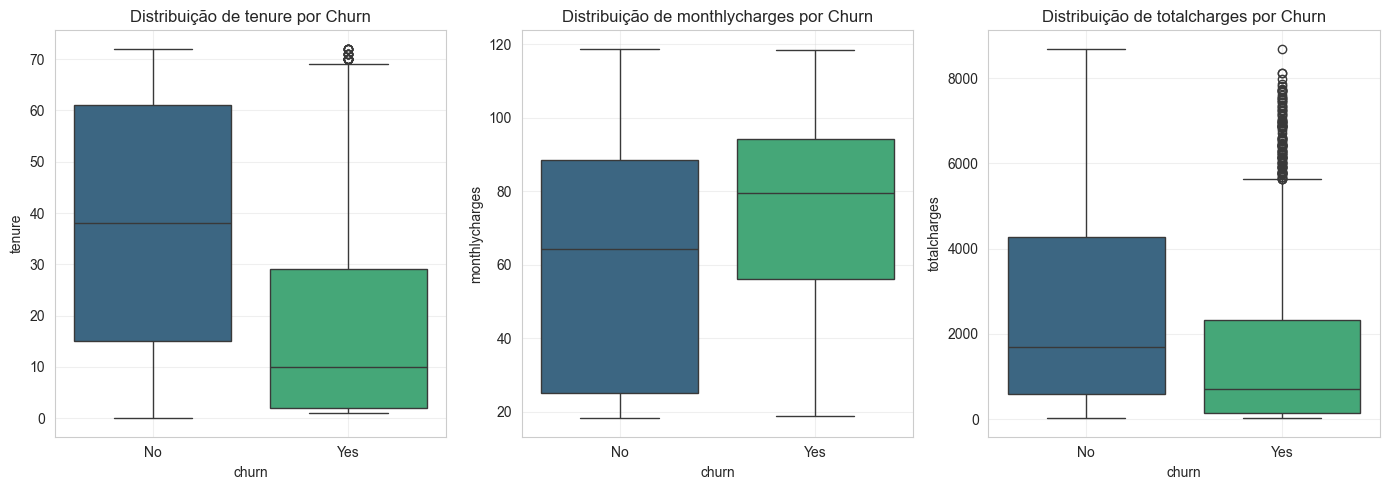

In [12]:
num_cols = ['tenure', 'monthlycharges', 'totalcharges']

# Criando Boxplots para ver a distribuição vs Churn
plt.figure(figsize=(14, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='churn', y=col, data=df, palette='viridis')
    plt.title(f'Distribuição de {col} por Churn')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Tenure**, o box do Yes(churn) está muito mais baixa proximo a 0, confirma a hipotese que novos clientes saem mais.


**Monthlycharges**, temos um leve indicio que preço mais altos causam mais cancelamentos, depois iremos confirma estatisticamente

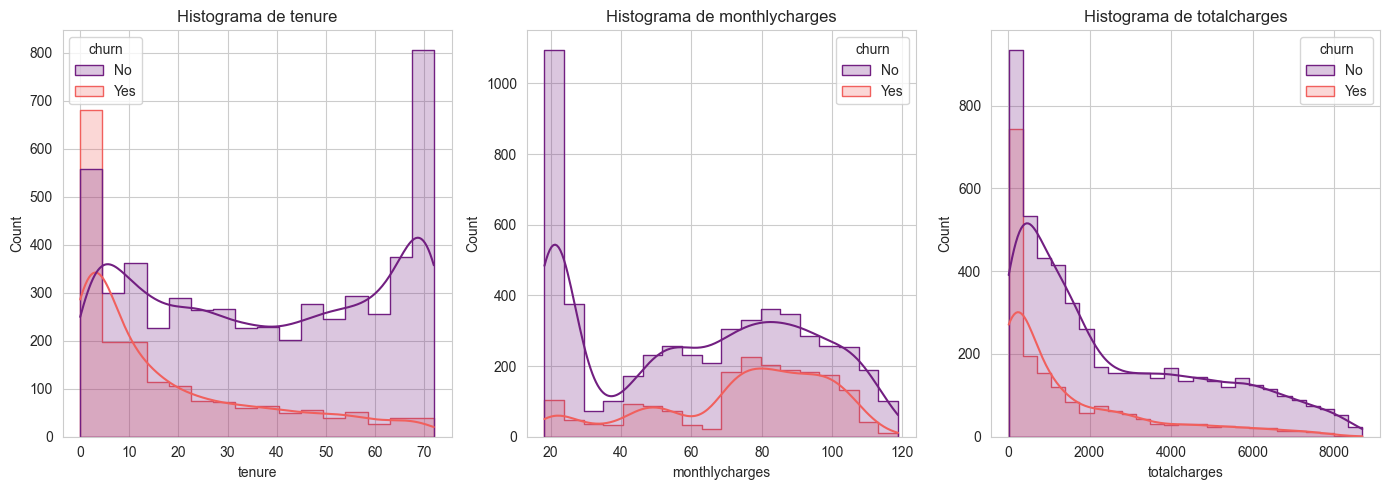

In [13]:
plt.figure(figsize=(14, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, hue='churn', kde=True, element="step", palette='magma')
    plt.title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

**Insights importantes a serem observados.**

**tenure**, temos provavelmente uma distribuição bimodal, onde temos dois pontos.
 - Primeiro ponto: Critico, clientes novos tem um churn extramamente alto, sera que testam nossos serviços e não ficam satisfeito com a primeira experiencia ou qualidade do serviço ?
 - Segundo ponto: Fidelizado, clientes mais antigos que estão extremamente confortaveis com nossos serviços.

**monthlycharge**, aqui temos uma condição bem sustentavel para clientes com mensalidades mais baratas. Porém mensalidade com valores mais alto tem uma proporção grande de churn.
 - Nossos serviços de fibra sao instaveis ? temos apoio técnico ?
 - Pacotes com multiplos serviços (Streaming, security, backup), não atende bem a necessidade do cliente ?


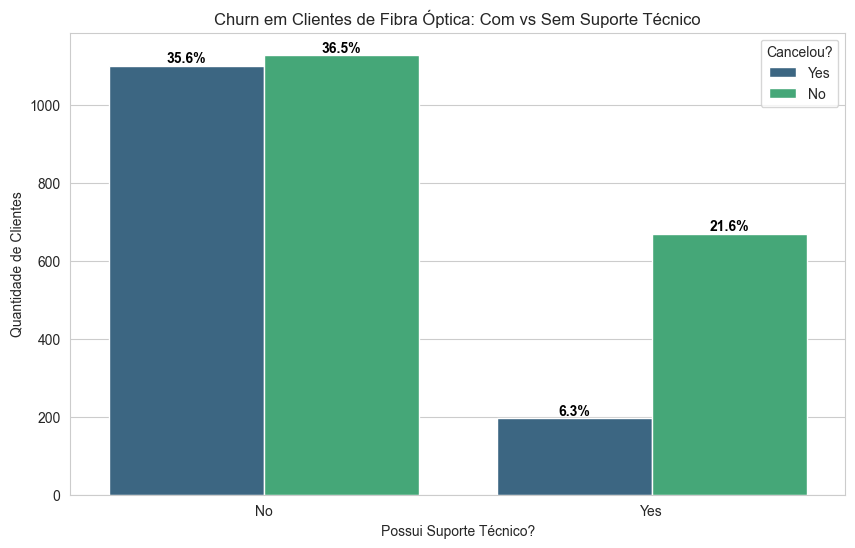

In [14]:

# Vamos filtrar apenas quem tem Fibra Óptica e ver a relação com TechSupport
df_fibra = df[df['internetservice'] == 'Fiber optic']

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_fibra, x='techsupport', hue='churn', palette='viridis')

plt.title('Churn em Clientes de Fibra Óptica: Com vs Sem Suporte Técnico')
plt.xlabel('Possui Suporte Técnico?')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelou?')

total = len(df_fibra) 

for p in ax.patches:
    height = p.get_height()
    # Verifica se a barra existe (height > 0) para evitar erros ou textos no chão
    if height > 0:
        # O cálculo aqui é: (quantidade da barra / total de fibra)
        percentage = f'{height/total:.1%}'
        
        # Coloca o texto: (x = centro da barra, y = altura da barra)
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), # Desloca 5 pontos para cima
                    textcoords = 'offset points',
                    fontsize=10, 
                    color='black', 
                    weight='bold')


plt.show()

Encontramos a principal causa do churn em fibra optica, clientes que não possuem suporte tecnico tem alta taxa de cancelamento

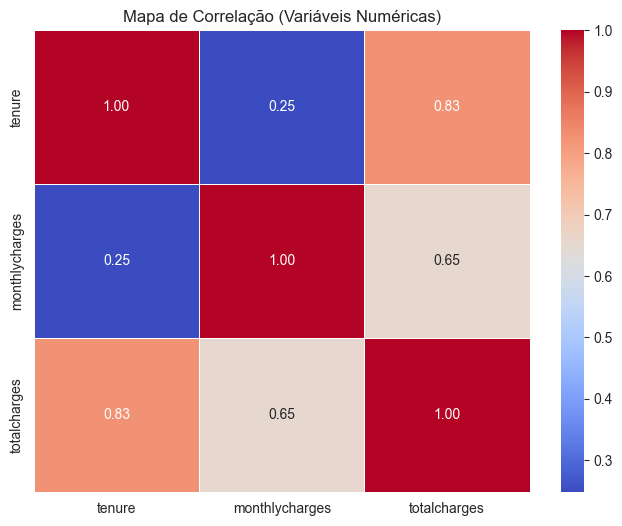

In [15]:
# Correlação entre variáveis numéricas
corr = df[['tenure', 'monthlycharges', 'totalcharges']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação (Variáveis Numéricas)')
plt.show()

# 2.1 Validação Estatística ( Teste de Hipótese)

In [21]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

print("--- Teste de Hipótese: monthlycharges vs churn ---")

# 1. Separando os grupos
grupo_churn_yes = df[df['churn'] == 'Yes']['monthlycharges']
grupo_churn_no = df[df['churn'] == 'No']['monthlycharges']

# 2. Teste de Normalidade (Shapiro-Wilk)
# H0 (Nula): Os dados seguem uma distribuição Normal (Gaussiana)
# Se p-value < 0.05, rejeitamos H0 (não é normal)
stat_yes, p_yes = shapiro(grupo_churn_yes)
stat_no, p_no = shapiro(grupo_churn_no)

print(f"Normalidade (churn=Yes): p-value = {p_yes:.5f}")
print(f"Normalidade (churn=No):  p-value = {p_no:.5f}")

# 3. Escolha do Teste e Execução
alpha = 0.05  # Nível de significância de 95%

if p_yes < alpha or p_no < alpha:
    print("\n-> Distribuição NÃO é normal. Usaremos Mann-Whitney U (Não-paramétrico).")
    stat, p_valor = mannwhitneyu(grupo_churn_yes, grupo_churn_no)
    teste_usado = "Mann-Whitney U"
else:
    print("\n-> Distribuição Normal. Usaremos T-Test (Paramétrico).")
    stat, p_valor = ttest_ind(grupo_churn_yes, grupo_churn_no)
    teste_usado = "T-Test"

# 4. Conclusão Final
print(f"\nResultado do {teste_usado}: P-value = {p_valor:.10f}")

print("-" * 40)
if p_valor < alpha:
    print(" REJEITAMOS a Hipótese Nula.")
    print("CONCLUSÃO: Existe uma diferença ESTATISTICAMENTE SIGNIFICATIVA nas mensalidades.")
    print("Isso confirma que o valor da fatura influencia o Churn.")
else:
    print(" FALHA ao rejeitar a Hipótese Nula.")
    print("CONCLUSÃO: Não há evidência suficiente para dizer que as médias são diferentes.")

--- Teste de Hipótese: monthlycharges vs churn ---
Normalidade (churn=Yes): p-value = 0.00000
Normalidade (churn=No):  p-value = 0.00000

-> Distribuição NÃO é normal. Usaremos Mann-Whitney U (Não-paramétrico).

Resultado do Mann-Whitney U: P-value = 0.0000000000
----------------------------------------
 REJEITAMOS a Hipótese Nula.
CONCLUSÃO: Existe uma diferença ESTATISTICAMENTE SIGNIFICATIVA nas mensalidades.
Isso confirma que o valor da fatura influencia o Churn.


## 2.2 Teste Chi-Quadrado para validar Hipotese sobre "Fiber Optic x Techsupport"

In [24]:
from scipy.stats import chi2_contingency

print("--- Teste de Hipótese: techsupport vs churn (Apenas Fibra Óptica) ---")

# 1. Filtrar apenas o universo que nos interessa: Fibra Óptica
df_fibra = df[df['internetservice'] == 'Fiber optic']

# 2. Criar a Tabela de Contingência (Cruzamento)
# Ela conta: Quantos cairam em cada combinação (Com Suporte/Saiu, Sem Suporte/Ficou, etc)
tabela_contingencia = pd.crosstab(df_fibra['techsupport'], df_fibra['churn'])

print("Tabela Cruzada (Observado):")
print(tabela_contingencia)
print("-" * 30)

# 3. Executar o Teste Qui-Quadrado (Chi-Square)
# H0 (Nula): Não existe relação. Ter suporte ou não, não muda nada no churn.
stat, p_valor, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Resultado do Qui-Quadrado: P-value = {p_valor:.10f}")

print("-" * 30)
if p_valor < 0.05:
    print(" REJEITAMOS a Hipótese Nula.")
    print("CONCLUSÃO: Existe uma dependência estatística FORTE.")
    print("Isso prova que ter 'techsupport' altera a chance de churn para clientes de Fibra.")
else:
    print(" FALHA ao rejeitar a Hipótese Nula.")
    print("CONCLUSÃO: O suporte técnico não parece influenciar o cancelamento.")

--- Teste de Hipótese: techsupport vs churn (Apenas Fibra Óptica) ---
Tabela Cruzada (Observado):
churn          No   Yes
techsupport            
No           1129  1101
Yes           670   196
------------------------------
Resultado do Qui-Quadrado: P-value = 0.0000000000
------------------------------
 REJEITAMOS a Hipótese Nula.
CONCLUSÃO: Existe uma dependência estatística FORTE.
Isso prova que ter 'techsupport' altera a chance de churn para clientes de Fibra.


In [25]:
df.to_csv('../data/processed/churn_pos_eda.csv', index=False)
print("Arquivo salvo em data/processed!")

Arquivo salvo em data/processed!
